In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Clone YOLOR
!git clone https://github.com/augmentedstartups/yolor
%cd yolor

Cloning into 'yolor'...
remote: Enumerating objects: 375, done.
remote: Total 375 (delta 0), reused 0 (delta 0), pack-reused 375
Receiving objects: 100% (375/375), 2.97 MiB | 14.46 MiB/s, done.
Resolving deltas: 100% (163/163), done.
/content/yolor


In [3]:
# Install Requirements
!pip install -qr requirements.txt

     |████████████████████████████████| 596 kB 5.5 MB/s 
     |████████████████████████████████| 776.7 MB 4.8 kB/s 
     |████████████████████████████████| 12.7 MB 19.1 MB/s 
     |████████████████████████████████| 1.5 MB 40.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.7.0 which is incompatible.
torchaudio 0.10.0+cu111 requires torch==1.10.0, but you have torch 1.7.0 which is incompatible.


In [4]:
# Clone and Install CUDA
!git clone https://github.com/JunnYu/mish-cuda
%cd mish-cuda
!python setup.py build install

Cloning into 'mish-cuda'...
remote: Enumerating objects: 195, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 195 (delta 7), reused 79 (delta 3), pack-reused 107
Receiving objects: 100% (195/195), 208.77 KiB | 3.07 MiB/s, done.
Resolving deltas: 100% (56/56), done.
/content/yolor/mish-cuda
/usr/lib/python3.7/distutils/extension.py:131: UserWarning: Unknown Extension options: 'headers'
  warnings.warn(msg)
running build
running build_py
creating build
creating build/lib.linux-x86_64-3.7
creating build/lib.linux-x86_64-3.7/mish_cuda
copying src/mish_cuda/__init__.py -> build/lib.linux-x86_64-3.7/mish_cuda
running egg_info
creating src/mish_cuda.egg-info
writing src/mish_cuda.egg-info/PKG-INFO
writing dependency_links to src/mish_cuda.egg-info/dependency_links.txt
writing requirements to src/mish_cuda.egg-info/requires.txt
writing top-level names to src/mish_cuda.egg-info/top_level.txt
writing manifest file 'src/mish_cuda.

In [5]:
# Clone and Install PyTorch
!git clone http://github.com/fbcotter/pytorch_wavelets
%cd pytorch_wavelets
!pip install .

Cloning into 'pytorch_wavelets'...
remote: Enumerating objects: 972, done.
remote: Counting objects: 100% (136/136), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 972 (delta 75), reused 89 (delta 45), pack-reused 836
Receiving objects: 100% (972/972), 6.80 MiB | 23.52 MiB/s, done.
Resolving deltas: 100% (659/659), done.
/content/yolor/mish-cuda/pytorch_wavelets
Processing /content/yolor/mish-cuda/pytorch_wavelets
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for pytorch-wavelets: filename=pytorch_wavelets-1.3.0-py3-none-any.whl size=54869 sha256=c52e759eaea48654f19fc4e97dd47edd7cabfca24b964c79ed563823a23

In [6]:
%cd ..

/content/yolor/mish-cuda


In [7]:
%cd ..

/content/yolor


In [8]:
!bash scripts/get_pretrain.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   2649      0 --:--:-- --:--:-- --:--:--  2649
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  142M  100  142M    0     0  84.7M      0  0:00:01  0:00:01 --:--:--  146M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   3090      0 --:--:-- --:--:-- --:--:--  3090
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  305M  100  305M    0     0  90.2M      0  0:00:03  0:00:03 --:--:--  113M


In [9]:
!python detect.py --source inference/images/horses.jpg --cfg cfg/yolor_p6.cfg --weights yolor_p6.pt --conf 0.25 --img-size 1280 --device 0 --output /content/drive/MyDrive/YoloR


Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolor_p6.cfg', classes=None, conf_thres=0.25, device='0', img_size=1280, iou_thres=0.5, names='data/coco.names', output='/content/drive/MyDrive/YoloR', save_txt=False, source='inference/images/horses.jpg', update=False, view_img=False, weights=['yolor_p6.pt'])
image 1/1 /content/yolor/inference/images/horses.jpg: 896x1280 5 horses, Done. (0.310s)
Results saved to /content/drive/MyDrive/YoloR
Done. (0.795s)


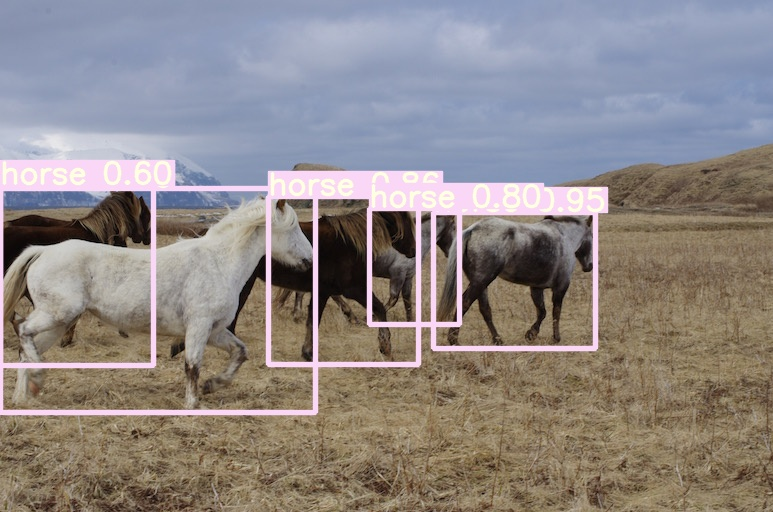

In [10]:
import glob 
from IPython.display import Image, display

for imageName in glob.glob('/content/drive/MyDrive/YoloR/*.jpg'):
  display(Image(filename=imageName))
  print('\n')

In [15]:
!python detect.py --source /content/drive/MyDrive/videos_originais/video05.mp4 --cfg cfg/yolor_p6.cfg --weights yolor_p6.pt --conf 0.25 --img-size 1280 --device 0 --output /content/drive/MyDrive/YoloR

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolor_p6.cfg', classes=None, conf_thres=0.25, device='0', img_size=1280, iou_thres=0.5, names='data/coco.names', output='/content/drive/MyDrive/YoloR', save_txt=False, source='/content/drive/MyDrive/videos_originais/video05.mp4', update=False, view_img=False, weights=['yolor_p6.pt'])
video 1/1 (1/729) /content/drive/MyDrive/videos_originais/video05.mp4: 768x1280 Done. (0.266s)
video 1/1 (2/729) /content/drive/MyDrive/videos_originais/video05.mp4: 768x1280 Done. (0.266s)
video 1/1 (3/729) /content/drive/MyDrive/videos_originais/video05.mp4: 768x1280 Done. (0.266s)
video 1/1 (4/729) /content/drive/MyDrive/videos_originais/video05.mp4: 768x1280 Done. (0.266s)
video 1/1 (5/729) /content/drive/MyDrive/videos_originais/video05.mp4: 768x1280 Done. (0.266s)
video 1/1 (6/729) /content/drive/MyDrive/videos_originais/video05.mp4: 768x1280 Done. (0.266s)
video 1/1 (7/729) /content/drive/MyDrive/videos_originais/video05.mp4: 768x1280 Done. (0.26